# LSTM Model with the error correctness and with Green data (Xout)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
from keras.layers import LSTM
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [2]:
# loading the data
df = pd.read_excel("103_upset (around 21000 points).xls", header= 3)
df.head(6)

,Time,,Flow,Flow.1,Flow.2,Flow.3,Flow.4,Flow.5,Press,Press.1,...,Press.4,Press.5,Press.6,Press.7,Temp,Temp.1,Temp.2,Temp.3,Temp.4,oxygen
0,NaN,NaN,BFW,BFW,Steam,Steam,Fuel gas,Air,FD disch,Fuel gas,...,ignitor,steam drm,steam drm,flue gas,Dertor,steam drm,super,super,flue gas,%
1,NaN,,92fi300.pv,92fy300.pv,92fi301.pv,92fi301.pv,92fi305.pv,92fi302.pv,92pi317.pv,92pi311.pv,...,92pi324.pv,92pi307.pv,92pi301.pv,92pi300.pv,93ti211.pv,92ti300a.pv,92ti300b.pv,92ti311.pv,92ti300.pv,92ai300.pv
2,NaN,2008-06-21 07:00:00,355.848491,355.234993,352.095325,352.095325,401.596232,1.12351,9.716322,7.576174,...,7.780427,628.271028,649.402659,0.310961,298.276672,597.732324,760.399808,765.36439,335.989723,2.05269
3,NaN,2008-06-21 07:00:01,355.877026,355.345775,354.608066,354.608066,401.471854,1.111719,9.716363,7.576189,...,7.780427,628.270974,649.402513,0.310964,298.276689,597.732295,760.399987,765.36489,335.989571,2.030534
4,NaN,2008-06-21 07:00:02,355.90556,355.456557,356.111179,356.111179,401.347476,1.099927,9.716405,7.576205,...,7.780427,628.270921,649.402367,0.310968,298.276707,597.732267,760.400165,765.36539,335.989419,2.018448
5,NaN,2008-06-21 07:00:03,355.934095,355.567339,356.604663,356.604663,401.223098,1.088136,9.716447,7.57622,...,7.780428,628.270868,649.402221,0.310972,298.276724,597.732239,760.400343,765.36589,335.989267,2.016434


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     0 non-null      float64
 1            21601 non-null  object 
 2   Flow     21602 non-null  object 
 3   Flow.1   21602 non-null  object 
 4   Flow.2   21602 non-null  object 
 5   Flow.3   21602 non-null  object 
 6   Flow.4   21602 non-null  object 
 7   Flow.5   21602 non-null  object 
 8   Press    21602 non-null  object 
 9   Press.1  21602 non-null  object 
 10  Press.2  21602 non-null  object 
 11  Press.3  21602 non-null  object 
 12  Press.4  21602 non-null  object 
 13  Press.5  21602 non-null  object 
 14  Press.6  21602 non-null  object 
 15  Press.7  21602 non-null  object 
 16  Temp     21602 non-null  object 
 17  Temp.1   21602 non-null  object 
 18  Temp.2   21602 non-null  object 
 19  Temp.3   21602 non-null  object 
 20  Temp.4   21602 non-null  object 
 21  oxygen   216

# Preprocessing

In [4]:
#Droping First colmun and First two rows
df=df.drop([0,1], axis=0)
df = df.drop(df.iloc[:,0:1],axis = 1)

In [5]:
df.head()

,,Flow,Flow.1,Flow.2,Flow.3,Flow.4,Flow.5,Press,Press.1,Press.2,...,Press.4,Press.5,Press.6,Press.7,Temp,Temp.1,Temp.2,Temp.3,Temp.4,oxygen
2,2008-06-21 07:00:00,355.848491,355.234993,352.095325,352.095325,401.596232,1.12351,9.716322,7.576174,0.008244,...,7.780427,628.271028,649.402659,0.310961,298.276672,597.732324,760.399808,765.36439,335.989723,2.05269
3,2008-06-21 07:00:01,355.877026,355.345775,354.608066,354.608066,401.471854,1.111719,9.716363,7.576189,0.008244,...,7.780427,628.270974,649.402513,0.310964,298.276689,597.732295,760.399987,765.36489,335.989571,2.030534
4,2008-06-21 07:00:02,355.90556,355.456557,356.111179,356.111179,401.347476,1.099927,9.716405,7.576205,0.008245,...,7.780427,628.270921,649.402367,0.310968,298.276707,597.732267,760.400165,765.36539,335.989419,2.018448
5,2008-06-21 07:00:03,355.934095,355.567339,356.604663,356.604663,401.223098,1.088136,9.716447,7.57622,0.008245,...,7.780428,628.270868,649.402221,0.310972,298.276724,597.732239,760.400343,765.36589,335.989267,2.016434
6,2008-06-21 07:00:04,355.96263,355.678121,355.491806,355.491806,401.09872,1.083197,9.716489,7.576236,0.008246,...,7.780428,628.270815,649.402075,0.310976,298.276742,597.73221,760.400521,765.366391,335.989115,2.01442


In [6]:
colWithTime=['Time','Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df.columns = colWithTime
col=['Flow BFW/ 92fi300.pv', 'Flow BFW/92fy300.pv','Flow Steam/92fi301.pv', 'Flow Steam/92fi301.pv.1', 'Flow Fuel gas/92fi305.pv', 'Flow Air/92fi302.pv', 'Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv', 'Press Fuel gas/92pi304.pv', 'Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Press flue gas/92pi300.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv','Temp super/92ti311.pv','Temp flue gas/92ti300.pv', 'oxygen% /92ai300.pv']
df[col] = df[col].apply(pd.to_numeric, errors= 'coerce', downcast= 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 2 to 21601
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        21600 non-null  object 
 1   Flow BFW/ 92fi300.pv        21510 non-null  float32
 2   Flow BFW/92fy300.pv         21582 non-null  float32
 3   Flow Steam/92fi301.pv       21582 non-null  float32
 4   Flow Steam/92fi301.pv.1     21582 non-null  float32
 5   Flow Fuel gas/92fi305.pv    21582 non-null  float32
 6   Flow Air/92fi302.pv         21582 non-null  float32
 7   Press FD disch/92pi317.pv   21582 non-null  float32
 8   Press Fuel gas/92pi311.pv   21582 non-null  float32
 9   Press Fuel gas/92pi304.pv   21582 non-null  float32
 10  Press furnce/92pi306.pv     21582 non-null  float32
 11  Press ignitor /92pi324.pv   21582 non-null  float32
 12  Press steam drm/92pi307.pv  21582 non-null  float32
 13  Press steam drm/92pi301.pv  215

In [7]:
# filling the null values of Press flue gas/92pi300.pv by the mean value
df['Press flue gas/92pi300.pv']= df['Press flue gas/92pi300.pv'].fillna(df['Press flue gas/92pi300.pv'].mean())
df['Press flue gas/92pi300.pv'].describe()

count    21600.000000
mean         0.335788
std          0.032409
min          0.276383
25%          0.308812
50%          0.335786
75%          0.361206
max          0.418377
Name: Press flue gas/92pi300.pv, dtype: float64

In [8]:
df['Time']= df['Time'].apply(pd.to_datetime ,errors= 'coerce' )

# dropping features marked us not needed for the model (Black)
df = df.drop("Flow BFW/92fy300.pv",axis = 1)
df = df.drop("Flow Steam/92fi301.pv",axis = 1)
df = df.drop("Temp super/92ti311.pv",axis = 1)

In [9]:
colToBeDropped = ['Press FD disch/92pi317.pv', 'Press Fuel gas/92pi311.pv','Press furnce/92pi306.pv', 'Press ignitor /92pi324.pv','Press steam drm/92pi307.pv', 'Press steam drm/92pi301.pv','Temp Dertor /93ti211.pv','Temp steam drm/92ti300a.pv','Temp super/92ti300b.pv']
df = df.drop(colToBeDropped,axis = 1)

In [10]:
display(df)

,Time,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv.1,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv,Press Fuel gas/92pi304.pv,Press flue gas/92pi300.pv,Temp flue gas/92ti300.pv,oxygen% /92ai300.pv
2,2008-06-21 07:00:00,355.848480,352.095337,401.596222,1.123510,0.008244,0.310961,335.989716,2.052690
3,2008-06-21 07:00:01,355.877014,354.608063,401.471863,1.111719,0.008244,0.310964,335.989563,2.030534
4,2008-06-21 07:00:02,355.905548,356.111176,401.347473,1.099927,0.008245,0.310968,335.989410,2.018448
5,2008-06-21 07:00:03,355.934082,356.604675,401.223083,1.088136,0.008245,0.310972,335.989258,2.016434
6,2008-06-21 07:00:04,355.962616,355.491791,401.098724,1.083197,0.008246,0.310976,335.989105,2.014420
...,...,...,...,...,...,...,...,...,...
21597,2008-06-21 12:59:55,355.894012,355.310516,384.652435,1.079072,0.050951,0.317213,355.115173,1.953448
21598,2008-06-21 12:59:56,355.618317,354.761658,384.477875,1.083946,0.050951,0.319882,355.113800,1.955882
21599,2008-06-21 12:59:57,355.342621,356.987366,383.877808,1.085681,0.050951,0.322551,355.112396,1.958315
21600,2008-06-21 12:59:58,355.066925,356.524109,384.063263,1.087415,0.050951,0.325220,355.111023,1.960749


In [11]:
df = df.dropna()

In [12]:
df.index = df.pop('Time')
df.head()

,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv.1,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv,Press Fuel gas/92pi304.pv,Press flue gas/92pi300.pv,Temp flue gas/92ti300.pv,oxygen% /92ai300.pv
Time,,,,,,,,
2008-06-21 07:00:00,355.848480,352.095337,401.596222,1.123510,0.008244,0.310961,335.989716,2.052690
2008-06-21 07:00:01,355.877014,354.608063,401.471863,1.111719,0.008244,0.310964,335.989563,2.030534
2008-06-21 07:00:02,355.905548,356.111176,401.347473,1.099927,0.008245,0.310968,335.989410,2.018448
2008-06-21 07:00:03,355.934082,356.604675,401.223083,1.088136,0.008245,0.310972,335.989258,2.016434
2008-06-21 07:00:04,355.962616,355.491791,401.098724,1.083197,0.008246,0.310976,335.989105,2.014420


# LSTM data preperation

In [13]:
PFG = df.drop(["Press Fuel gas/92pi304.pv","Press flue gas/92pi300.pv","Temp flue gas/92ti300.pv","oxygen% /92ai300.pv"],axis=1)
display(PFG.shape)
display(PFG.head())

(21510, 4)

,Flow BFW/ 92fi300.pv,Flow Steam/92fi301.pv.1,Flow Fuel gas/92fi305.pv,Flow Air/92fi302.pv
Time,,,,
2008-06-21 07:00:00,355.848480,352.095337,401.596222,1.123510
2008-06-21 07:00:01,355.877014,354.608063,401.471863,1.111719
2008-06-21 07:00:02,355.905548,356.111176,401.347473,1.099927
2008-06-21 07:00:03,355.934082,356.604675,401.223083,1.088136
2008-06-21 07:00:04,355.962616,355.491791,401.098724,1.083197


In [14]:
# defining the output columns
ypf1= df[['Press Fuel gas/92pi304.pv']]
ypf1= ypf1.to_numpy()
ypf1= ypf1.reshape(-1,1)

ypf2= df[['Press flue gas/92pi300.pv']]
ypf2= ypf2.to_numpy()
ypf2= ypf2.reshape(-1,1)

ypf3= df[['Temp flue gas/92ti300.pv']]
ypf3= ypf3.to_numpy()
ypf3= ypf3.reshape(-1,1)

ypf4= df[['oxygen% /92ai300.pv']]
ypf4= ypf4.to_numpy()
ypf4= ypf4.reshape(-1,1)

In [15]:
# from sklearn.preprocessing import StandardScaler


s1 =StandardScaler()
s2 =StandardScaler()
s3 =StandardScaler()
s4 =StandardScaler()
s5 =StandardScaler()

s1= s1.fit(ypf1)
s2= s2.fit(ypf2)
s3= s3.fit(ypf3)
s4= s4.fit(ypf4)
s5= s5.fit(PFG)

ypf1=s1.transform(ypf1)
ypf2=s2.transform(ypf2) 
ypf3=s3.transform(ypf3) 
ypf4=s4.transform(ypf4) 
PFG= s5.transform(PFG)

PFG = pd.DataFrame(PFG)
PFG['4'] = ypf1
PFG['5'] = ypf2
PFG['6'] = ypf3
PFG['7'] = ypf4
display(PFG)
PFG= PFG.to_numpy()

,0,1,2,3,4,5,6,7
0,-0.881771,-0.999253,-0.776401,-0.779465,-1.715859,-0.763103,-1.427880,0.351670
1,-0.881143,-0.943277,-0.779261,-0.815387,-1.715824,-0.762984,-1.427896,0.215753
2,-0.880514,-0.909792,-0.782123,-0.851309,-1.715788,-0.762863,-1.427912,0.141616
3,-0.879885,-0.898799,-0.784985,-0.887230,-1.715752,-0.762744,-1.427929,0.129261
4,-0.879256,-0.923590,-0.787845,-0.902277,-1.715717,-0.762624,-1.427945,0.116905
...,...,...,...,...,...,...,...,...
21505,-0.880768,-0.927629,-1.166193,-0.914843,1.660349,-0.569094,0.635765,-0.257123
21506,-0.886844,-0.939856,-1.170209,-0.899993,1.660349,-0.486283,0.635617,-0.242192
21507,-0.892919,-0.890274,-1.184014,-0.894709,1.660349,-0.403472,0.635465,-0.227263
21508,-0.898995,-0.900594,-1.179747,-0.889425,1.660349,-0.320661,0.635317,-0.212332


In [16]:
X = []
y = []

num_of_future_sec = 1
num_of_past_sec = 10

for i in range(num_of_past_sec, len(PFG) - num_of_future_sec + 1):
    X.append(PFG[i - num_of_past_sec:i,0:PFG.shape[1]])
    y.append(PFG[i + num_of_future_sec - 1:i + num_of_future_sec,4:8])

In [17]:
X, y =np.array(X), np.array(y)
y = y.reshape(-1,4)
X = X[:,:,0:4]
X.shape , y.shape

((21500, 10, 4), (21500, 4))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Model data preperation


In [19]:
display(X_train.shape)
display(y_train.shape)

(13760, 10, 4)

(13760, 4)

# Modeling

In [20]:
model1 = Sequential()
model1.add(LSTM(128,input_shape = (X_train.shape[1], X_train.shape[2]),activation = 'relu'))
model1.add(Dense(64, 'relu'))
model1.add(Dense(32, 'relu'))
model1.add(Dense(y_train.shape[1],activation = 'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 78,564
Trainable params: 78,564
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [22]:
# display(X_train.shape)
# display(y_train.shape[2])
# display(X_val.shape)
# display(y_val.shape)

In [23]:
history = model1.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size=32, epochs=100)

Epoch 1/100
430/430 [==============================] - 14s 17ms/step - loss: 0.6644 - root_mean_squared_error: 0.8151 - val_loss: 0.4474 - val_root_mean_squared_error: 0.6688
Epoch 2/100
430/430 [==============================] - 7s 15ms/step - loss: 0.3769 - root_mean_squared_error: 0.6140 - val_loss: 0.3362 - val_root_mean_squared_error: 0.5798
Epoch 3/100
430/430 [==============================] - 6s 14ms/step - loss: 0.2771 - root_mean_squared_error: 0.5264 - val_loss: 0.2590 - val_root_mean_squared_error: 0.5090
Epoch 4/100
430/430 [==============================] - 6s 14ms/step - loss: 0.2424 - root_mean_squared_error: 0.4924 - val_loss: 0.2305 - val_root_mean_squared_error: 0.4801
Epoch 5/100
430/430 [==============================] - 6s 14ms/step - loss: 0.2259 - root_mean_squared_error: 0.4753 - val_loss: 0.2236 - val_root_mean_squared_error: 0.4728
Epoch 6/100
430/430 [==============================] - 6s 14ms/step - loss: 0.2172 - root_mean_squared_error: 0.4660 - val_loss: 

Epoch 48/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1530 - root_mean_squared_error: 0.3911 - val_loss: 0.1583 - val_root_mean_squared_error: 0.3979
Epoch 49/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1534 - root_mean_squared_error: 0.3917 - val_loss: 0.1588 - val_root_mean_squared_error: 0.3985
Epoch 50/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1521 - root_mean_squared_error: 0.3900 - val_loss: 0.1515 - val_root_mean_squared_error: 0.3892
Epoch 51/100
430/430 [==============================] - 6s 13ms/step - loss: 0.1504 - root_mean_squared_error: 0.3878 - val_loss: 0.1525 - val_root_mean_squared_error: 0.3905
Epoch 52/100
430/430 [==============================] - 6s 13ms/step - loss: 0.1514 - root_mean_squared_error: 0.3891 - val_loss: 0.1546 - val_root_mean_squared_error: 0.3932
Epoch 53/100
430/430 [==============================] - 6s 13ms/step - loss: 0.1509 - root_mean_squared_error: 0.3885 - val_l

Epoch 95/100
430/430 [==============================] - 6s 13ms/step - loss: 0.1333 - root_mean_squared_error: 0.3651 - val_loss: 0.1329 - val_root_mean_squared_error: 0.3646
Epoch 96/100
430/430 [==============================] - 5s 11ms/step - loss: 0.1330 - root_mean_squared_error: 0.3647 - val_loss: 0.1337 - val_root_mean_squared_error: 0.3656
Epoch 97/100
430/430 [==============================] - 5s 13ms/step - loss: 0.1327 - root_mean_squared_error: 0.3643 - val_loss: 0.1326 - val_root_mean_squared_error: 0.3642
Epoch 98/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1331 - root_mean_squared_error: 0.3649 - val_loss: 0.1333 - val_root_mean_squared_error: 0.3652
Epoch 99/100
430/430 [==============================] - 6s 14ms/step - loss: 0.1315 - root_mean_squared_error: 0.3626 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3652
Epoch 100/100
430/430 [==============================] - 5s 13ms/step - loss: 0.1309 - root_mean_squared_error: 0.3618 - val_

# MSE plot

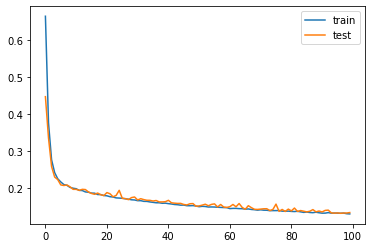

In [25]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# RMSE plot

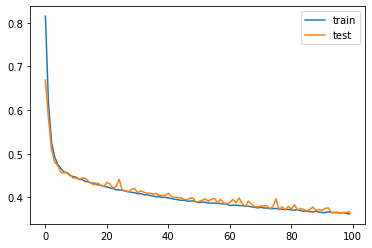

In [26]:
plt.plot(history.history['root_mean_squared_error'], label='train')
plt.plot(history.history['val_root_mean_squared_error'], label='test')
plt.legend()
plt.show()

# Results of the model without timesteps

In [27]:
test_predictions = model1.predict(X_test)

135/135 [==============================] - 1s 6ms/step


In [28]:
test_predictions.shape

(4300, 4)

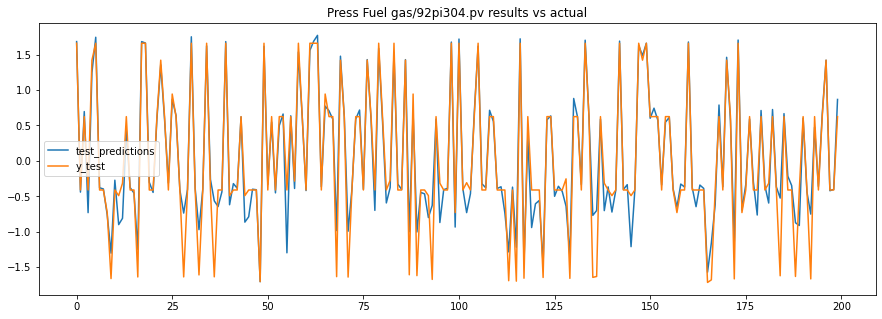

In [29]:
plt.figure(figsize=(15,5))
plt.title("Press Fuel gas/92pi304.pv results vs actual")
plt.plot(test_predictions[:200,0])
plt.plot(y_test[:200,0])
plt.legend(["test_predictions","y_test"])
plt.show()

In [30]:
# plt.figure(figsize=(15,5))
# plt.title("Press Fuel gas/92pi304.pv results vs actual")
# sns.scatterplot

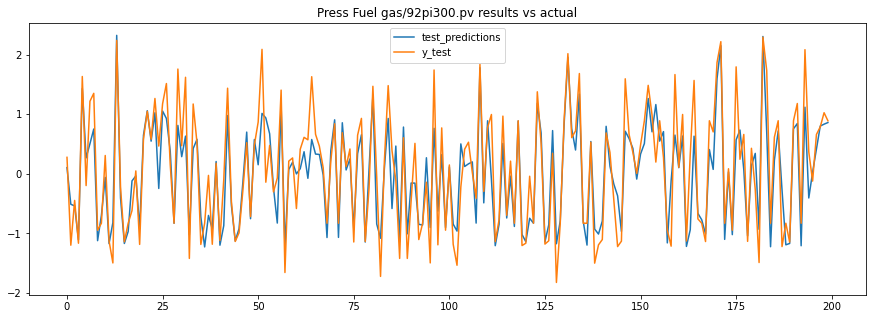

In [31]:
plt.figure(figsize=(15,5))
plt.title("Press Fuel gas/92pi300.pv results vs actual")
plt.plot(test_predictions[:200,1])
plt.plot(y_test[:200,1])
plt.legend(["test_predictions","y_test"])
plt.show()

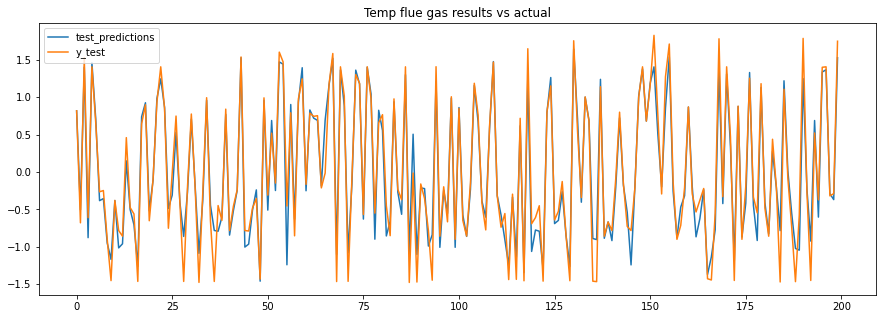

In [32]:
plt.figure(figsize=(15,5))
plt.title("Temp flue gas results vs actual")
plt.plot(test_predictions[:200,2])
plt.plot(y_test[:200,2])
plt.legend(["test_predictions","y_test"])
plt.show()

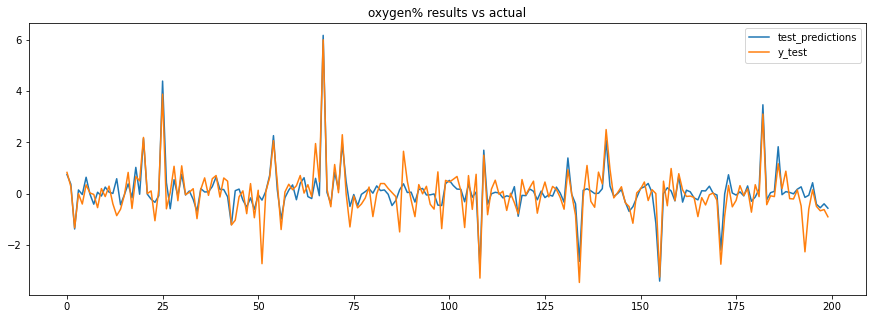

In [33]:
plt.figure(figsize=(15,5))
plt.title("oxygen% results vs actual")
plt.plot(test_predictions[:200,3])
plt.plot(y_test[:200,3])
plt.legend(["test_predictions","y_test"])
plt.show()

In [34]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

def maxMape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.max(np.abs((y_test - pred) / y_test))
    return mape

In [35]:
print(F"The MAPE value of Press Fuel gas/92pi304 {mape(y_test[:,0],test_predictions[:,0])}")
print(F"The MAPE value of Press Fuel gas/92pi300 {mape(y_test[:,1],test_predictions[:,1])}")
print(F"The MAPE value of Temp flue gas {mape(y_test[:,2],test_predictions[:,2])}")
print(F"The MAPE value of oxygen% {mape(y_test[:,3],test_predictions[:,3])}")

The MAPE value of Press Fuel gas/92pi304 0.25961852073669434
The MAPE value of Press Fuel gas/92pi300 2.8396050930023193
The MAPE value of Temp flue gas 0.38932955265045166
The MAPE value of oxygen% 1.926568627357483


In [36]:
from sklearn.metrics import mean_squared_error as MSE
print(F"The RMSE value of Press Fuel gas/92pi304 {np.sqrt(MSE(y_test[:,0],test_predictions[:,0]))}")
print(F"The RMSE value of Press Fuel gas/92pi300 {np.sqrt(MSE(y_test[:,1],test_predictions[:,1]))}")
print(F"The RMSE value of Temp flue gas {np.sqrt(MSE(y_test[:,2],test_predictions[:,2]))}")
print(F"The RMSE value of oxygen% {np.sqrt(MSE(y_test[:,3],test_predictions[:,3]))}")

The RMSE value of Press Fuel gas/92pi304 0.2830340564250946
The RMSE value of Press Fuel gas/92pi300 0.45011481642723083
The RMSE value of Temp flue gas 0.2077828347682953
The RMSE value of oxygen% 0.4527278244495392


In [38]:
print(F"The Max MAPE value of Press Fuel gas/92pi304 {maxMape(y_test[:,0],test_predictions[:,0])}")
print(F"The Max MAPE value of Press Fuel gas/92pi300 {maxMape(y_test[:,1],test_predictions[:,1])}")
print(F"The Max MAPE value of Temp flue gas {maxMape(y_test[:,2],test_predictions[:,2])}")
print(F"The Max MAPE value of oxygen% {maxMape(y_test[:,3],test_predictions[:,3])}")

The Max MAPE value of Press Fuel gas/92pi304 3.432981491088867
The Max MAPE value of Press Fuel gas/92pi300 410.2925109863281
The Max MAPE value of Temp flue gas 54.74665451049805
The Max MAPE value of oxygen% 230.8585662841797
